# **Проект №6. Магазин компьютерных игр (сборный)** <a class="tocSkip">

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1">Описание проекта</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2">Импорт библиотек</a></span></li><li><span><a href="#Функции" data-toc-modified-id="Функции-3">Функции</a></span></li><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-4">Общая информация о данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1">Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5">Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Переименовывание-колонок" data-toc-modified-id="Переименовывание-колонок-5.1">Переименовывание колонок</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-5.2">Обработка пропусков</a></span></li><li><span><a href="#Общаяя-обработка-данных" data-toc-modified-id="Общаяя-обработка-данных-5.3">Общаяя обработка данных</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-5.4">Изменение типов данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5">Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-6">Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1">Вывод</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-7">Портрет пользователя каждого региона</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.1">Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-8">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-8.1">Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-8.2">Гипотеза 2</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8.3">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9">Общий вывод</a></span></li></ul></div>

##  Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для  взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB.
Данные за 2016 год могут быть неполными.


## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy import stats as st

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
sns.set(rc={'figure.figsize': (8, 4)})
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn')

## Функции

In [2]:
# Для проверки пропусков в колонках
def inform_nan(df):
    print('Число пропусков: ', df.isna().sum())
    print(f'Процент пропусков: {df.isna().mean():.1%}')


# Для проверки общей информации по таблице
def info_data(df):
    print('\n', '\033[1m'+'Общая информация по таблице:'+'\033[0m')
    try:
        df.info(show_counts=False)
    except:
        df.info(null_counts=False)
    print('\n', 'Слуйчайные строки из таблицы:')
    if df.shape[0] < 5:
        display(df.sample(df.shape[0]))
    else:
        display(df.sample(5))
    print('\n', 'Статистика числовых параметров:')
    display(df.describe().T)
    
    if 'object' in df.dtypes.to_list():
        print('\n', 'Статистика строковых параметров:')
        display(df.describe(include='object').T)
    else:
        print('\n', 'В данных отсутствуют строковые значения')

    print('\n', 'Статистика пропусков в данных:')
    display(df.isna()
              .agg(['sum', 'mean']).T
              .rename(columns={'sum' : 'Кол-во пропусков',
                               'mean': '% пропусков'})
              .sort_values('% пропусков', ascending=False)
              .style.format({'Кол-во пропусков': '{:,.0f}'.format,
                             '% пропусков'     : '{:,.1%}'.format}))

    print('\n', 'Количество явных дубликатов:', df.duplicated().sum())


# Для изменеия типов данных в колонках
def change_the_type(list_columns, typ):
    for i in list_columns:
        df_game[i] = df_game[i].astype(typ)
    display(df_game[list_columns].dtypes)

##  Общая информация о данных

Выгрузим данные и посмотрим что они из себя представляют

In [3]:
try:
    df_game = pd.read_csv('games.csv')
except:
    df_game = pd.read_csv('/datasets/games.csv')
info_data(df_game)


 Общая информация по таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Name             object 
 1   Platform         object 
 2   Year_of_Release  float64
 3   Genre            object 
 4   NA_sales         float64
 5   EU_sales         float64
 6   JP_sales         float64
 7   Other_sales      float64
 8   Critic_Score     float64
 9   User_Score       object 
 10  Rating           object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

 Слуйчайные строки из таблицы:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16432,Nakayoshi All-Stars: Mezase Gakuen Idol,DS,2008.00,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11283,Animal Planet: Emergency Vets,DS,2009.00,Simulation,0.08,0.00,0.00,0.01,NaN,tbd,E
14347,Custom Beat Battle: Draglade 2,DS,2008.00,Fighting,0.00,0.00,0.03,0.00,NaN,NaN,NaN
10237,Outlaw Golf: Nine Holes of Christmas,XB,2002.00,Sports,0.08,0.02,0.00,0.00,NaN,NaN,NaN
3155,Stuntman: Ignition,X360,2007.00,Racing,0.25,0.31,0.00,0.07,75.00,7.3,T



 Статистика числовых параметров:


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.00,2006.48,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
NA_sales,16715.00,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,16715.00,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,16715.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,16715.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,8137.00,68.97,13.94,13.00,60.00,71.00,79.00,98.00



 Статистика строковых параметров:


,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990



 Статистика пропусков в данных:


,Кол-во пропусков,% пропусков
Critic_Score,"8,578",51.3%
Rating,"6,766",40.5%
User_Score,"6,701",40.1%
Year_of_Release,269,1.6%
Name,2,0.0%
Genre,2,0.0%
Platform,0,0.0%
NA_sales,0,0.0%
EU_sales,0,0.0%
JP_sales,0,0.0%



 Количество явных дубликатов: 0


16 тысяч строк, 11 колонок, 5 колонко с типом данных `object` где нужно будет проверить данные на категориальность и правильность занесенных значений и 6 колонок с типом `float64` где нужно привести к менее ресурсозатратному типу данных с проверкой на выбросы. Название колонок нужно изменить к тсандартному змеиному регистру.

Информация по продажам представлена в миллионах копий и, судя по значениям в таблице, в основном все данные в значении меньше 1, поэтому чтобы было удобней из анализировать лучше перевести кратно тысячи, а не миллиону. Так же не помешала бы колонака с общим объемом продаж.

В наименовании игр есть дубликаты возможно это означает, что одну и туже игру выпускают на разных платформах.

Наибольшее количество пропусков находятся в колонках с рейтингом и оценкой игр, нужно разобраться можно ли как-то заполнить пропуски и если да то как?. В информации о дате релиза есть 269 пропусков, хоть и пропусков меньше 2% нужно будет дополнительно посмотреть что это за пропуски. Так же есть незначительные пропуски в имени и жанре игры, необходимо посмотреть что это за пропуски и можно ли их дулать без вреда для данных.

Оценку пользователей и критикой желательно привести к одной шкале, чтобы их было удобней сравнивать, поэтому логично будет разделить оценку критиков на 10, чтобы оценка было на шкале от 0 до 10.

В описании к заданию имеется подсказка про аббревиатуру 'tbd', которая является самой популярной в колонке, исходя из интернета такое обозначения применяется при еще не определенном параметре, поэтому из логичней заменить на NaN, добавить дополнительную колонку, где '1' отменить такие знания, а колонку 'User_Score' изменить формат на float

### Вывод

- Данные ппредоставлены с некорректными названиями столбцов
- Количество видимых анамалий в данных незначительно

##  Подготовка данных

В первую приведем в нужный вид названии колонок

### Переименовывание колонок

In [4]:
df_game.columns = map(str.lower, df_game.columns)
df_game.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков

Начнем обработку пропусков с колонки имени

In [5]:
df_game[df_game['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно что пропуски имеются у 1 платформы в 93 году, посмотри на них внимательней.

In [6]:
df_game[(df_game['year_of_release']==1993)&(df_game['platform']=='GEN')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.00,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.00,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.00,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.00,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.00,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.00,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.00,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Несмотря на то что нехватает 2 названий игр и одна игра с пропущенным именем составляет большую продажу в америке по плотформе "GEN" за 1993 год. Поэтому заменим пропуски по этим колонкам на 'no_name' и 'no_genre'

In [7]:
df_game['name']  = df_game['name'].fillna('no_name')
df_game['genre'] = df_game['genre'].fillna('no_genre')

Посмотри на пропуски в `year_of_release`

In [8]:
df_game[df_game['year_of_release'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.00,0.35,82.00,6.8,T
14350,Bikkuriman Daijiten,DS,NaN,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
8151,Otomedius Excellent,X360,NaN,Shooter,0.13,0.00,0.04,0.01,48.00,8.1,T
4945,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,0.18,0.14,0.00,0.06,70.00,7.6,T
12524,Chou Soujuu Mecha MG,DS,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN
7354,Breakaway IV,2600,NaN,Puzzle,0.20,0.01,0.00,0.00,NaN,NaN,NaN
1984,Legacy of Kain: Soul Reaver,PS,NaN,Action,0.58,0.40,0.00,0.07,91.00,9,T
8067,Backbreaker,X360,NaN,Sports,0.17,0.00,0.00,0.01,54.00,7.6,E
5857,The Dukes of Hazzard II: Daisy Dukes It Out,PS,NaN,Racing,0.17,0.11,0.00,0.02,53.00,tbd,E
5889,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.00,8.2,E


Какой-то закономерности в пропущенных данных нет, но если пропуски удалить, мы можем ухудшить качество, так как платформы разные, а объемы продаж существенны и мы элементарно можем удалить значительную часть данных по какой-либо платформе. Заполнять же пропуски не рационально так как год может быть любым, а случайные значения могут исказить действительность.

Заменим аббревиатуру 'tbd' и отметим в его наличие в отдельной колонке

In [9]:
df_game['is_tbd'] = df_game['user_score'] == 'tbd'
df_game['is_tbd'].value_counts()

False    14291
True      2424
Name: is_tbd, dtype: int64

In [10]:
df_game.loc[df_game['user_score'] == 'tbd', 'user_score'] = np.nan

In [11]:
df_game['user_score'].isna().sum()

9125

Как видно число пропусков увеличилось (6701 -> 9125), но зато формат данных можно изменить на числовое и проводить с данными математические операции. Заполнять пропуски в этих данных как и остальных оставшиесях не имеет смысла.

Попробуем посмотреть в каких данных заполнен столбец `rating`

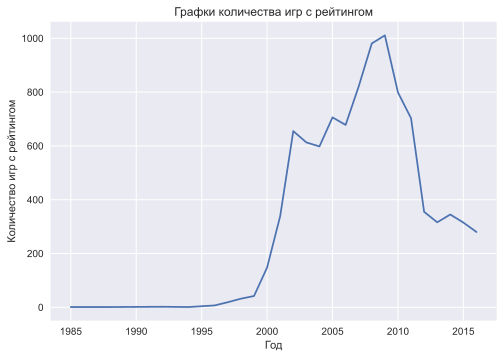

In [12]:
df_game[~df_game['rating'].isna()]['year_of_release'] \
       .value_counts().sort_index(ascending=False).plot()
plt.title('Графки количества игр с рейтингом')
plt.xlabel('Год')
plt.ylabel('Количество игр с рейтингом')
plt.show()

Скорей всего количество заполненых данных зависит от объема продаваемых игр. Попробуем посмотреть на каких платформах проставлен рейтинг

In [13]:
df_game[~df_game['rating'].isna()]['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

17 из 31 платформы. Возможно здесь представлены самые популярные платформы, это можно будет проверить позже.

Замним пустые значения в рейтинге на 'Отсутствует' чтобы можно было анализировать такие данные на равно с остальными значениями

In [14]:
df_game['rating'] = df_game['rating'].fillna('Отсутствует')

### Общаяя обработка данных

Сделаем общую колонку с продажами

In [15]:
df_game['all_sales'] = df_game['na_sales'] + df_game['eu_sales'] + df_game['jp_sales'] + df_game['other_sales']

Изменим оценку критиков для удобства анализа, разделим все значения на 10

In [16]:
df_game['critic_score'] = df_game['critic_score'] / 10

Посмотрим повнимателней на столбец rating

In [17]:
df_game['rating'].value_counts()

Отсутствует    6766
E              3990
T              2961
M              1563
E10+           1420
EC                8
K-A               3
RP                3
AO                1
Name: rating, dtype: int64

Как можно заметить, 4 категории очень мало встречаются, поэтому заменим этим оценка на "Отсутствует"

In [18]:
list_rating = ['EC', 'K-A', 'RP', 'AO']
for name in list_rating:
    df_game.loc[df_game['rating'] == name, 'rating'] = 'Отсутствует'
df_game['rating'].value_counts()

Отсутствует    6781
E              3990
T              2961
M              1563
E10+           1420
Name: rating, dtype: int64

### Изменение типов данных

Оптимизируем тип данных

In [19]:
df_game.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
is_tbd                bool
all_sales          float64
dtype: object

Год переведем в тип uint16 так как у нас нет отрицательных значений, максимальное значение меньше 65 тысяч.

In [20]:
df_game['year_of_release'] = df_game['year_of_release'].astype('uint16', errors='ignore')
df_game['year_of_release'].dtypes

dtype('float64')

Все остальные чсловые значения изменим на float16 так как значения имеют числа после запятой.

In [21]:
list_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score' ,'user_score', 'all_sales']
for i in list_columns:
    df_game[i] = df_game[i].astype('float16')
df_game[list_columns].dtypes

na_sales        float16
eu_sales        float16
jp_sales        float16
other_sales     float16
critic_score    float16
user_score      float16
all_sales       float16
dtype: object

Платформу, рейтинг и жанр изменим на категории

In [22]:
change_the_type(['platform', 'genre', 'rating'], 'category')

platform    category
genre       category
rating      category
dtype: object

In [23]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16446 non-null  float64 
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  float16 
 5   eu_sales         16715 non-null  float16 
 6   jp_sales         16715 non-null  float16 
 7   other_sales      16715 non-null  float16 
 8   critic_score     8137 non-null   float16 
 9   user_score       7590 non-null   float16 
 10  rating           16715 non-null  category
 11  is_tbd           16715 non-null  bool    
 12  all_sales        16715 non-null  float16 
dtypes: bool(1), category(3), float16(7), float64(1), object(1)
memory usage: 557.3+ KB


### Вывод

В результате подготовки мы получили более чистые и достоверные данные.

##  Анализ данных

Приступая к анализу сначала посмотрим на выпуск игр в целом по годам

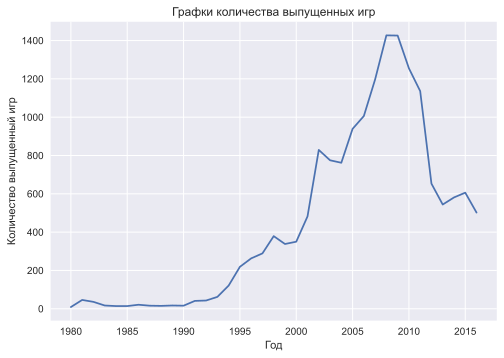

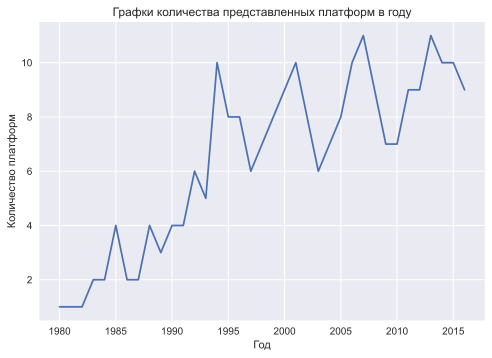

In [24]:
df_game.groupby('year_of_release')['name'].count().plot()
plt.title('Графки количества выпущенных игр')
plt.xlabel('Год')
plt.ylabel('Количество выпущенный игр')
plt.show()

df_game.groupby('year_of_release')['platform'].nunique().plot()
plt.title('Графки количества представленных платформ в году')
plt.xlabel('Год')
plt.ylabel('Количество платформ')
plt.show()

Исходя по графикам можно увидеть, что с 1990 года началось постепенное увеличение количество игр выпускаемых на всех палформах, и судя по тому, что количество платформ не уменьшалось, количество игр после 2009 года (бум видеоигр) уменьшалось. И если мы хотим делать анализ на будущее наврядли на понадобятся данные старше 2000 года.

Спад в индустрии видеоигр сложно объяснить по имеющимся данным но можно сделать предположение, что возможно тут повлиял кризис 2008 года, возможно изменился типаж людей которые играют в игры и стало солжнее угождать игрокам, возможно игры стало делать тяжелее (улучшение графики, механики и т.п.) и их стало меньше, возможно из-за немногих игр с хорошей графикой, упали продажи игр с обычной на то время графиков, возможно роль сыграл распространяющийся интернет и появлении онлайн игр, возможно часть игроков перешли на мобильный гейминг.

Помсмотри детальней как изменялось количество игр по популярным платформам. возьмем топ 10 платформ по сумме продаж

In [25]:
top_pltform_list = list(df_game.groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10).index)
top_pltform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

Посмотрим теперь как менялись продажи во времени по этим платформам

In [26]:
df = df_game[df_game['platform'].isin(top_pltform_list)].copy()

In [27]:
df['platform'].unique()

['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PS', 'PC', 'PSP']
Categories (31, object): ['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne']

Вариант как мне удалось избавиться от большой легенды

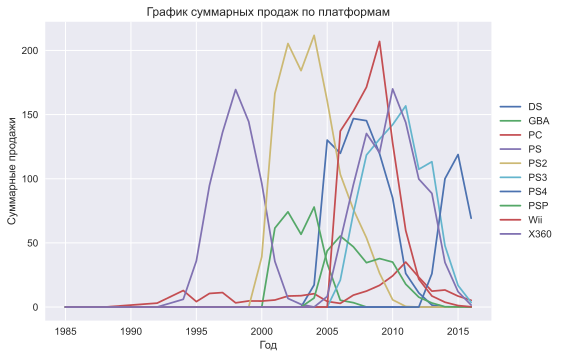

In [28]:
df['platform'] = df['platform'].astype('object').astype('category')

df.pivot_table(index  ='year_of_release', 
               columns='platform', 
               values ='all_sales', 
               aggfunc='sum').plot()

plt.title('График суммарных продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Любовь живет 3 года, а платформа и 6 не проживет. Как можно заметить на графике популярные платформы "живут" в примерно 5-6 лет. 

По уже сделанным выводам возьмем актуальный период в 7 лет, это позволит взять весь период падения продаж игр с 2010 года и так же включит несколько поколений платформ.

In [29]:
df_actual = df_game.query('year_of_release > 2009').copy()
df_actual['year_of_release'].nunique()

7

In [30]:
df_actual['platform'] = df_actual['platform'].astype('object').astype('category')

In [31]:
df_actual['platform'].unique()

['X360', 'PS3', 'DS', 'PS4', '3DS', ..., 'WiiU', 'PC', 'PSP', 'PSV', 'PS2']
Length: 12
Categories (12, object): ['3DS', 'DS', 'PC', 'PS2', ..., 'Wii', 'WiiU', 'X360', 'XOne']

In [32]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5277 entries, 14 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             5277 non-null   object  
 1   platform         5277 non-null   category
 2   year_of_release  5277 non-null   float64 
 3   genre            5277 non-null   category
 4   na_sales         5277 non-null   float16 
 5   eu_sales         5277 non-null   float16 
 6   jp_sales         5277 non-null   float16 
 7   other_sales      5277 non-null   float16 
 8   critic_score     2312 non-null   float16 
 9   user_score       2499 non-null   float16 
 10  rating           5277 non-null   category
 11  is_tbd           5277 non-null   bool    
 12  all_sales        5277 non-null   float16 
dtypes: bool(1), category(3), float16(7), float64(1), object(1)
memory usage: 217.7+ KB


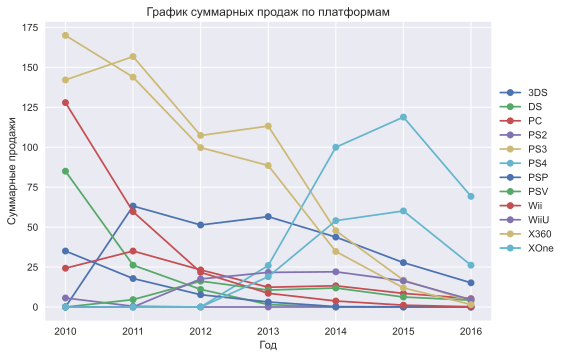

In [33]:
df_actual_pivot = df_actual.pivot_table(index ='year_of_release', 
                                       columns='platform', 
                                       values ='all_sales', 
                                       aggfunc='sum').plot(style='o-')

plt.title('График суммарных продаж по платформам')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Судя по графику в последнее время продолжается снижение уровня продажи видеоигр, не смотря на "скачок" в 2015 году.

In [34]:
df_actual[df_actual['year_of_release']==2016].groupby('platform')['all_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4    69.25
XOne   26.16
3DS    15.14
PC      5.25
WiiU    4.60
PSV     4.25
PS3     3.60
X360    1.52
Wii     0.18
DS      0.00
Name: all_sales, dtype: float16

Наиболее перспективными платформами является тройка популярных платформ:
- PS4
- XOne
- 3DS 

И не смотря на общее падение продаж видеоигр, лучше всего будет ориентироваться на эту тройку. А PS5 ждать еще долго.

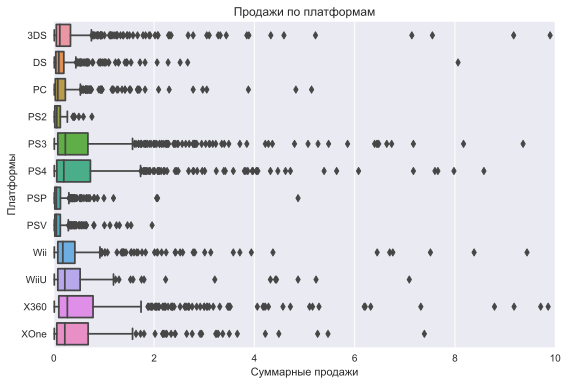

In [35]:
plt.figure(figsize=(9,6))
sns.boxplot(y="platform", x="all_sales", data=df_actual, orient="h")

plt.title('Продажи по платформам')
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформы')
plt.xlim(0, 10)
plt.show()

Как видно на графике, в основном все хорошо продаваемые игры являются сильными выбросами. И раз у нас период за 7 лет, можно заметить хорошие продажи у PS3 и X360. Но медианные значения находятся очень низко, что говорит нам о том, что игры как правило продаются в небольших объемах на всех платформах. Так же заметно преимущество платформ линеек PlayStation (PS3 b PS4) и Xbox(X360 и XOne) в виду их конкурентного преимущества и популярности.

Посмотрим как 

<Figure size 432x432 with 0 Axes>

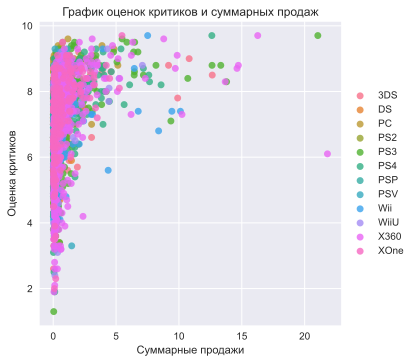

Коэффициент корреляции Пирсона: 0.3170


In [36]:
plt.figure(figsize=(6,6))
sns.lmplot(x="all_sales", y="critic_score",
           data=df_actual, fit_reg=False,
           hue='platform', legend=False)

plt.title('График оценок критиков и суммарных продаж')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценка критиков')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print(f"Коэффициент корреляции Пирсона: {df_actual['all_sales'].corr(df_actual['critic_score']):.4f}")

Ввиду специфичного рынка японии, посмотрим на распределние из рынка отдельно

<Figure size 432x432 with 0 Axes>

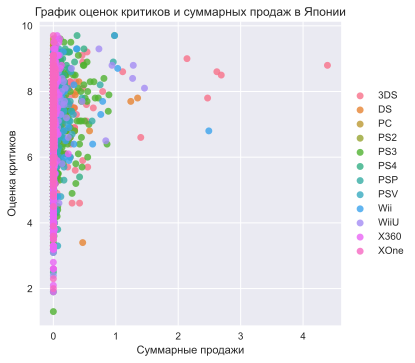

Коэффициент корреляции Пирсона: 0.1316


In [37]:
plt.figure(figsize=(6,6))
sns.lmplot(x="jp_sales", y="critic_score",
           data=df_actual, fit_reg=False,
           hue='platform', legend=False)

plt.title('График оценок критиков и суммарных продаж в Японии')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценка критиков')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print(f"Коэффициент корреляции Пирсона: {df_actual['jp_sales'].corr(df_actual['critic_score']):.4f}")

Посмотрим зависимость продаж и оценок уже пользователей

<Figure size 432x432 with 0 Axes>

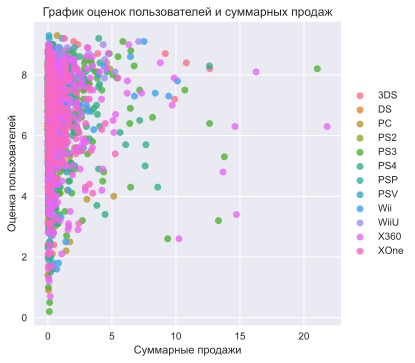

Коэффициент корреляции Пирсона: 0.0554


In [38]:
plt.figure(figsize=(6,6))
sns.lmplot(x="all_sales", y="user_score",
           data=df_actual, fit_reg=False,
           hue='platform', legend=False)

plt.title('График оценок пользователей и суммарных продаж')
plt.xlabel('Суммарные продажи')
plt.ylabel('Оценка пользователей')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print(f"Коэффициент корреляции Пирсона: {df_actual['all_sales'].corr(df_actual['user_score']):.4f}")

Судя по графикам наиболее успешным играм присваевается высокая оценка (выше среднего), однако пользователи не всегда могут быть согласны с такой оценкой, и как правило их оценка ниже чем у критиков, с чем это связана, сказать сложно.

Если судить по оценкам критиков, то получается что у продаваемых игр нет плохих оценок и оно в целом понятно, если игра плохая, она бы не продавалась. Но оценка пользователей показывает, что оценка в малой степени влияет на продажи (если мы говорит о игра продаваемые выше 5 млн копий), а коэффициент корреляции продаж с оценкой критиков выше чем с оценкой пользователей.

Для игр до 5 мле копий прослеживается зависимость количества продаж о ценок, с ростом оценки идет рост продаж игр на любой платформе. И так как оценка критиков появляется как правило до выхода игры, на нее стоит обращать внимание при планировании работы магазине на будующий год.

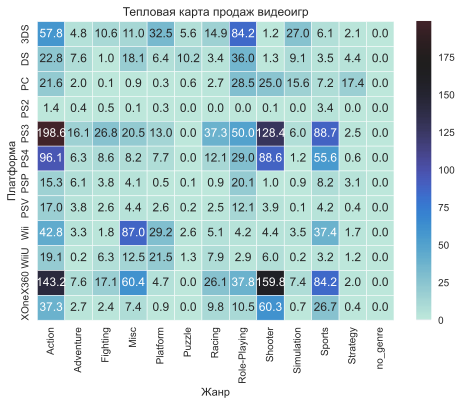

In [39]:
platform_genre_sales = df_actual.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='all_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, center=170)
plt.title('Тепловая карта продаж видеоигр')
plt.xlabel('Жанр')
plt.ylabel('Платформа')
plt.show()

Из тепловой диаграммы видно, что лидерами продаж являются жанры 'Action' и 'Shooter'

### Вывод

- Необходимо ориентироватся на тройку популярных платформ (PS4, XOne, 3DS)
- При планировании рекламы стоит учитывать оценку критиков
- И обращать особое внимание на жанры игр 'Action' и 'Shooter'

##  Портрет пользователя каждого региона

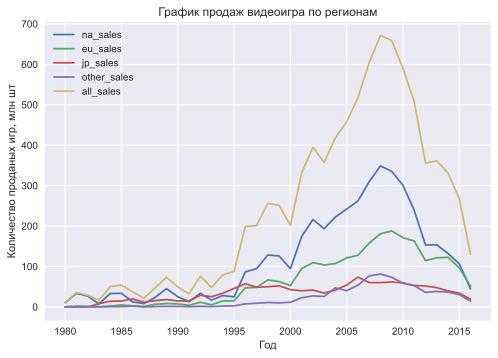

In [40]:
sales_df = df_game[[x for x in df.columns if 'sales' in x] + ['year_of_release']]
sales_df.groupby('year_of_release').sum().plot()
plt.title('График продаж видеоигра по регионам')
plt.xlabel('Год')
plt.ylabel('Количество проданых игр, млн шт')
plt.show()

Как можно заметить на графике большую часть видеоигр продается на рынке северной америки, после нее идет рынок европы.

Посмотрим какие платформы и жанры преобладают в каждом регоине

In [41]:
regoin_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_list = pd.DataFrame(columns=regoin_sales)
for region in regoin_sales:
    region_list[region]=list(df_actual.groupby('platform')
                                      .sum()[region]
                                      .sort_values(ascending=False)
                                      .head(5).index)
region_list

,na_sales,eu_sales,jp_sales,other_sales
0,X360,PS3,3DS,PS3
1,PS3,X360,PS3,PS4
2,Wii,PS4,PSP,X360
3,PS4,PC,DS,Wii
4,XOne,Wii,PSV,XOne


Здесь мы можем увидеть преобладание таких платформ как X360 и PS3 и судя по тому что PS3 занимает во семх регионах TOP2, данную платформу можно назвать универсальной.

In [42]:
regoin_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_list = pd.DataFrame(columns=regoin_sales)
for region in regoin_sales:
    region_list[region]=list(df_actual.groupby('genre')
                                      .sum()[region]
                                      .sort_values(ascending=False)
                                      .head(5).index)
region_list

,na_sales,eu_sales,jp_sales,other_sales
0,Action,Action,Role-Playing,Action
1,Shooter,Shooter,Action,Shooter
2,Sports,Sports,Misc,Sports
3,Misc,Role-Playing,Platform,Role-Playing
4,Role-Playing,Misc,Adventure,Misc


Здесь виднеется тройка лидеров таких как: Action, Shooter и Sports и только рынок Японии имеет свою специфику где преобладает жанр Role-Playing, так как очень популярен среди жителей острова и в целом менталитет японцев отличается от остального мира.

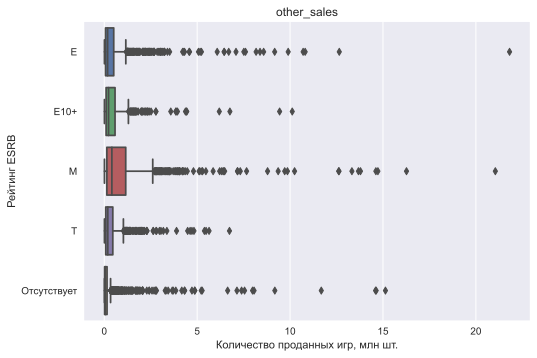

In [43]:
sns.boxplot(y="rating", x="all_sales", data=df_actual, orient="h")
plt.title(region)
plt.xlabel('Количество проданных игр, млн шт.')
plt.ylabel('Рейтинг ESRB')
plt.show()

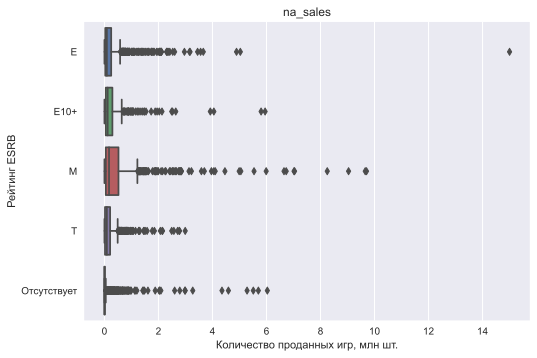

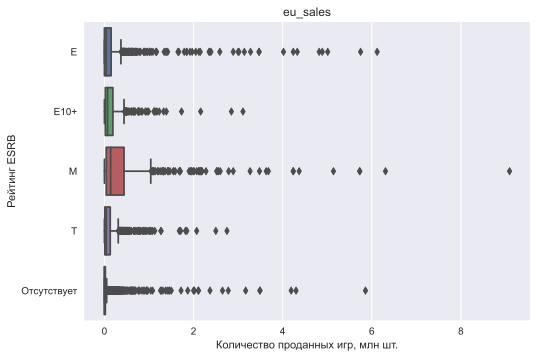

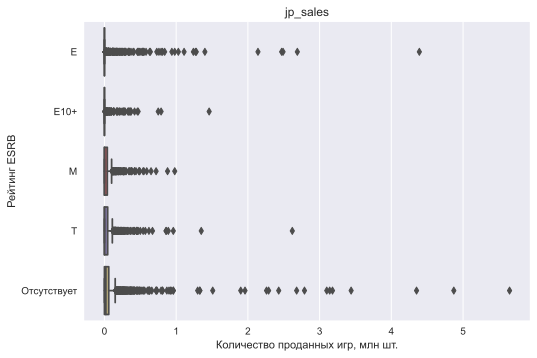

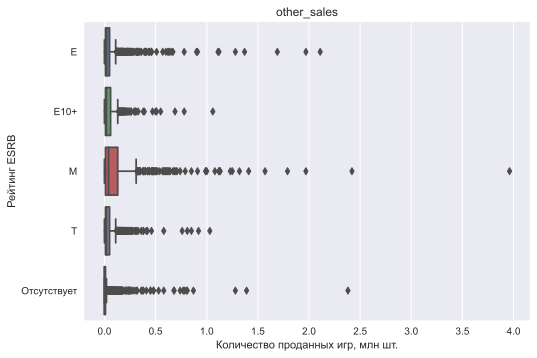

In [44]:
for region in regoin_sales:
    sns.boxplot(y="rating", x=region, data=df_actual, orient="h")
    
    plt.title(region)
    plt.xlabel('Количество проданных игр, млн шт.')
    plt.ylabel('Рейтинг ESRB')
    plt.show()
    print()

Как можно заметить во всех регионах кроме японии, продажи игр с рейтингом выше чем без него, особенно это заметно на играх с рейтингом M игр не подходящих для подростков младше 17 лет. Японские же пользователи видимо не доверяют рейтингу ESRB, поэтому игр с рейтингом ESRB немного и рейтинг не влияет на продажу в данном регионе. Возможно тут играет местный менталитет и особенность пользователей, которые любят игры собственного производства.

### Вывод

- Рынок Северной Америки - самый большой рынок видеоигр, вторым после него идет рынок Европы.
- Во всех регионах кроме японского популярын платформы X360, PS3, PS4. В японском рынке высокой популярностью пользуется 3DS.
- Во всех регионах кроме японского популярын жарны Action, Shooter и Sports.
- Рейтинг ESRB с большой вероятностью влияет на продажи видеоигр (за искобчением рынка Японии).
- Рынок японии специфицен и отличается от остального мира.

##  Проверка гипотез

Попробуем проверить несколько гипотез.

### Гипотеза 1

За нулевую гипотезу возьмем что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а альтернативную, что средние пользовательские рейтинги платформ Xbox One и PC разный. Альфу возьмем стандартным значением в 5%.

In [45]:
alpha = .05

sample_xbox = df_actual[(df_actual['platform'] == 'XOne')&
                        (~df_actual['user_score'].isna())]['user_score']
sample_pc   = df_actual[(df_actual['platform'] == 'PC')&
                        (~df_actual['user_score'].isna())]['user_score']

results = st.ttest_ind(
    sample_xbox, 
    sample_pc)

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.97714
Не получилось отвергнуть нулевую гипотезу


Как видно из тестов среднии значения не отличаются между данными платформами

### Гипотеза 2

За нулевую гипотезу возьмем что средние пользовательские рейтинги жанров Action и Sports одинаковые, а за альтернативную, что рейтинг разный.

In [46]:
alpha = .05

sample_action = df_actual[(df_actual['genre']   == 'Action')&
                        (~df_actual['user_score'].isna())]['user_score']
sample_sports   = df_actual[(df_actual['genre'] == 'Sports')&
                        (~df_actual['user_score'].isna())]['user_score']

results = st.ttest_ind(
    sample_action, 
    sample_sports)

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.00000
Отвергаем нулевую гипотезу


От сюда делаем вывод, что скорей среднее значени рейтинга в данных жанрах вероятней всего разные.

Попробуем посмотреть какая среднее выше

In [47]:
print(f'Средняя оценка пользователей жанра action: {sample_action.mean():.2f}')
print(f'Средняя оценка пользователей жанра sports: {sample_sports.mean():.2f}')

Средняя оценка пользователей жанра action: 6.78
Средняя оценка пользователей жанра sports: 5.90


На основе этих данных можно сделать, что жанр action больше нравится пользователм нежели sports

### Вывод

С наибольшей вероятностью можно утверждать что среднее значение оценок пользователей между платформами Xbox One и PC одинаковые, а вот по жанрами Action и Sports она разные и у Action оценка пользователей выше.

##  Общий вывод

Обобщая всю проделанную работу, можно сказать, что для в мире существует определенное доминирование  в области платформ и жанров видео игр. И для успешной работы магазина нужно это учитывать, а так же незабывать про специфичность рынков.

Если магазин работает по всему миру, то логичней всего рекомендовать ставку делать на самый большой рынок видеоигр, а конкретней на рынок северной америки, где больше всего преобладают такие платформы как X360 и PS3 и жанры Action, Shooter и Sports. При этом нужно внимательней присматриваться к оценке критиков перед выходом игры, что может послужить маркером успешной игры. А так же не забывать про рейтинг ESRB, что так же может послужить маркером хорошо продаваемой игры (в особенности рейтинг M)

В других же регионах (кроме Японии) сохраняется подобная тенденция и более подробный анализ можно посмотреть в работе выше. Японский же рынок нужно анализировать отдельно, так как он очень отличается от остального мире. В японском рынке преобладает платформа 3DS и жанр Role-Playing, и при этом нет никаких отличий в продаже между играми с рейтингами ESRB и без них.